In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files

In [2]:
all_scores = {} # model A layer : dict of scores to other layers in model B
model_A_layers = list(range(1,6))
for layer_id in model_A_layers:
    with open(f'pythia70m_L{layer_id}_pythia160m_multL.pkl', "rb") as f:
        layer_to_dictscores = pickle.load(f)
        all_scores[layer_id] = layer_to_dictscores

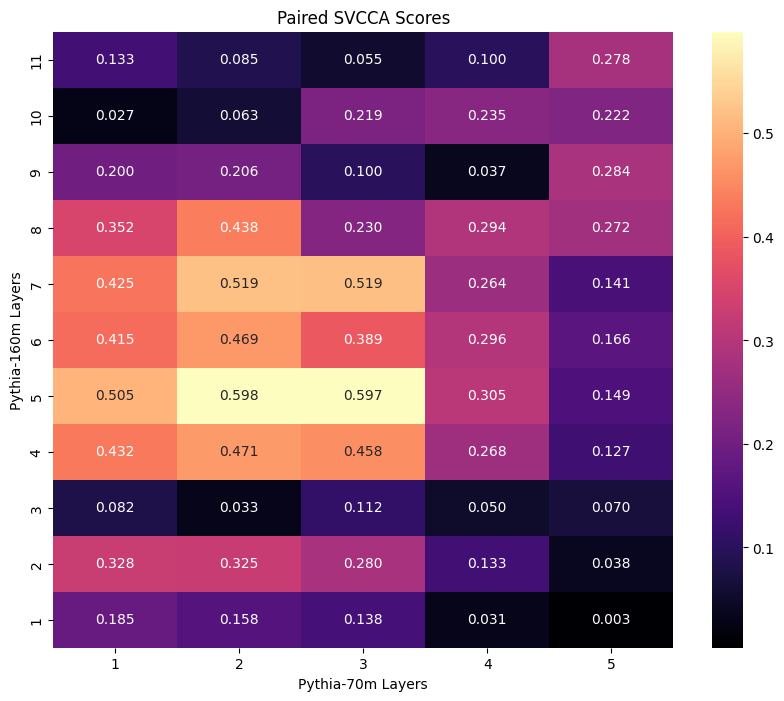

In [ ]:
all_scores_paired_svcca = {}

for layerID_A, layer_to_dictscores in all_scores.items():
    layerID_A_scores = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0:
            score = scores_dict['svcca_paired']
            layerID_A_scores[layerID_B] = score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores

scores_df = pd.DataFrame(all_scores_paired_svcca)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(scores_df, annot=True, cmap='magma', cbar=True, fmt=".3f")
plt.title("Paired SVCCA Scores")
plt.xlabel("Pythia-70m Layers")
plt.ylabel("Pythia-160m Layers")

ax.invert_yaxis()
plt.show()

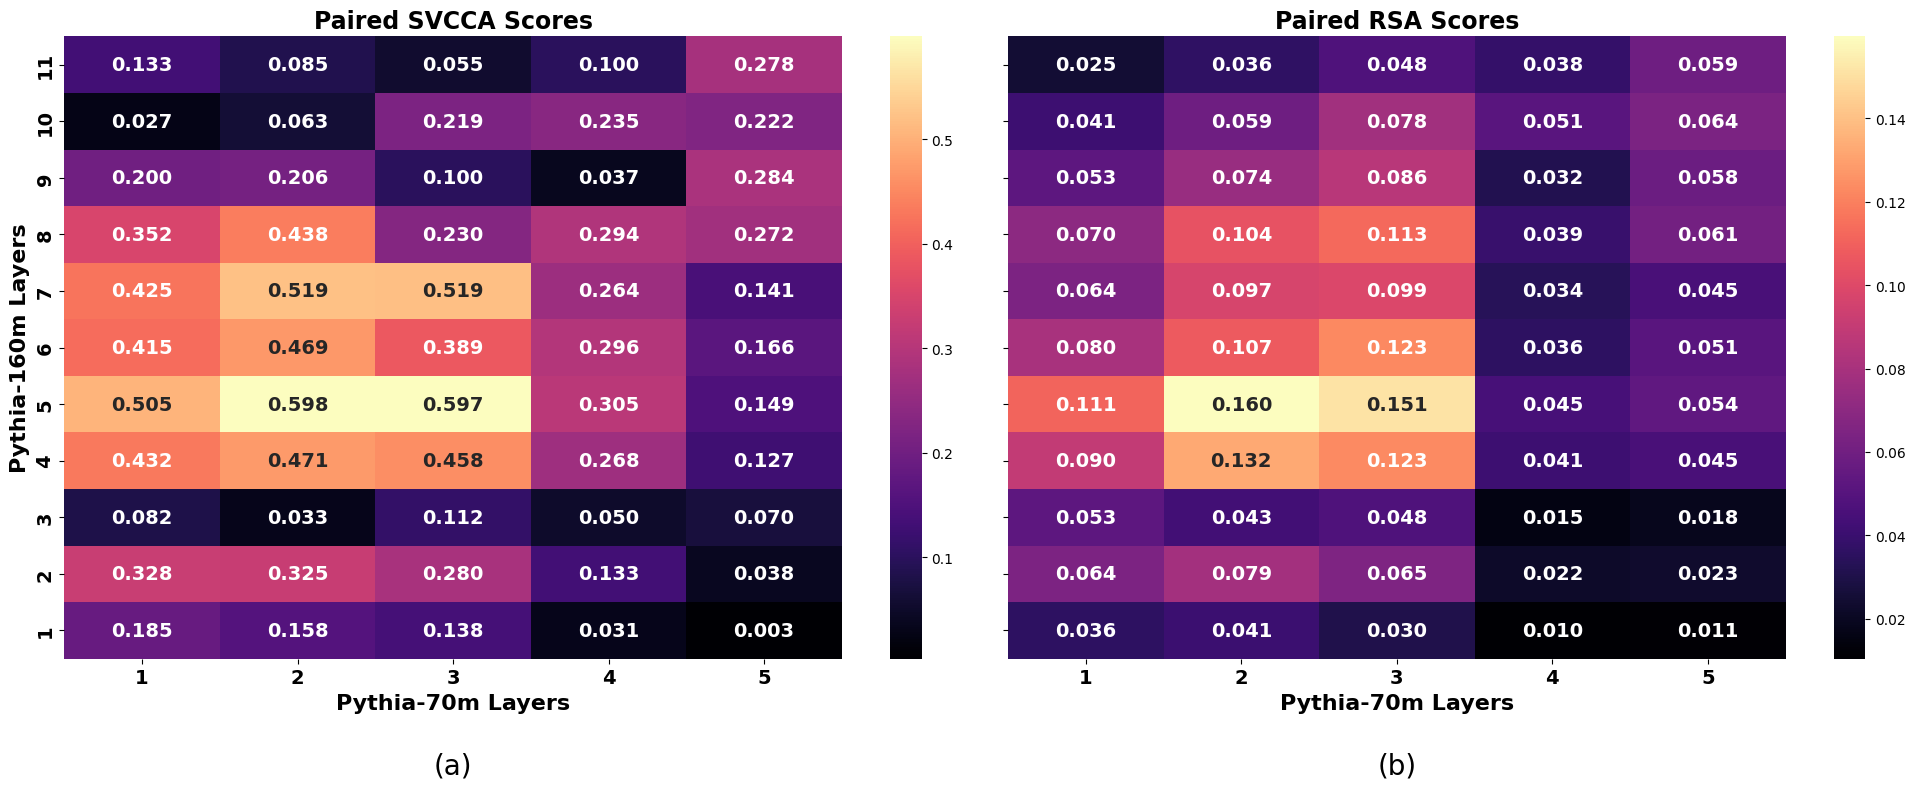

In [ ]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['svcca_paired']
            rsa_score = scores_dict['rsa_paired']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'})
axes[0].set_title("Paired SVCCA Scores", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'})
axes[1].set_title("Paired RSA Scores", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')

plt.show()


In [ ]:
from google.colab import files
files.download('heatmap_comparison.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

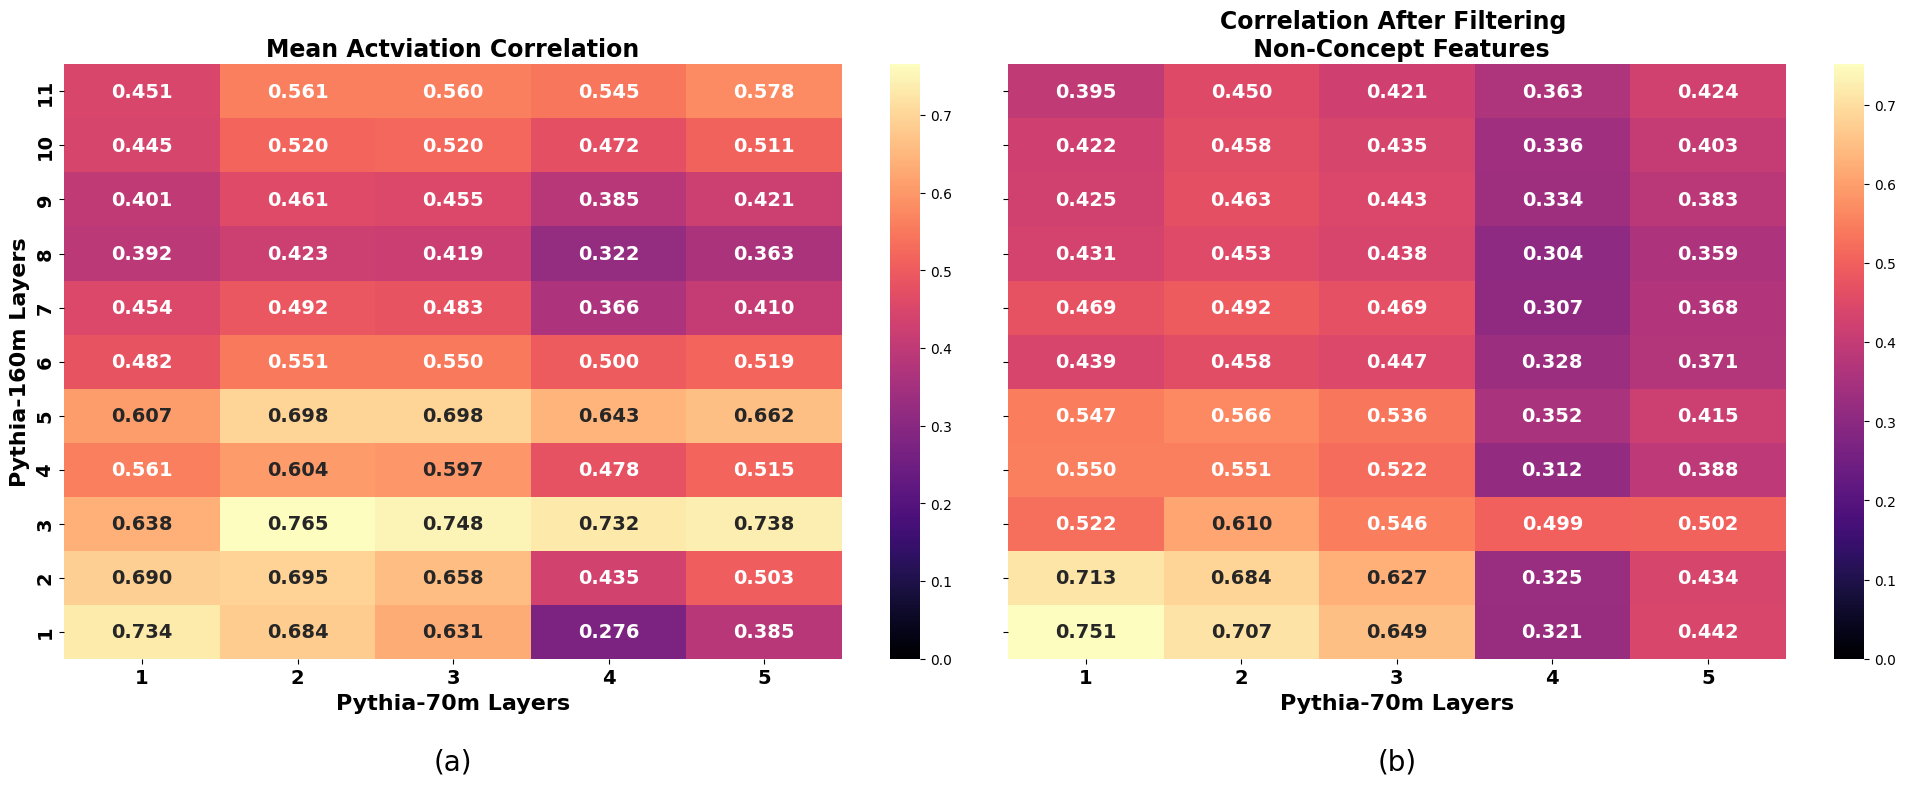

In [ ]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['mean_actv_corr']
            rsa_score = scores_dict['mean_actv_corr_filt']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap with vmax set to 0.6
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[0].set_title("Mean Actviation Correlation", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap with vmax set to 0.6
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[1].set_title("Correlation After Filtering \n Non-Concept Features", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')
plt.show()

In [ ]:

files.download('heatmap_comparison.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

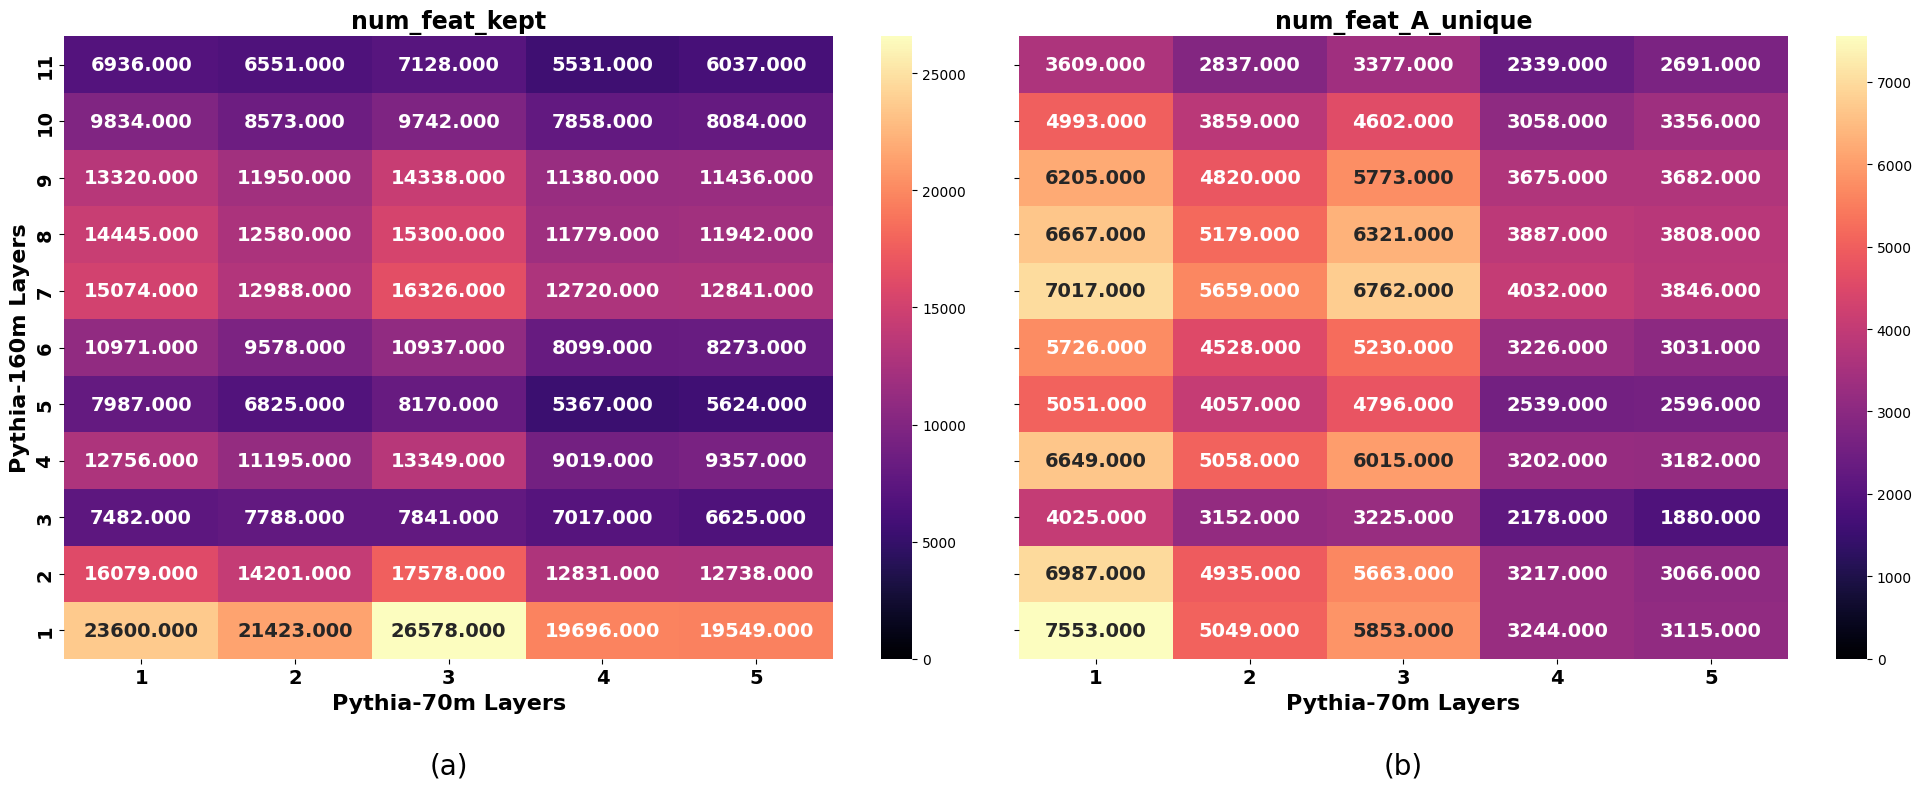

In [3]:
# Initialize dictionaries for the different scores
all_scores_paired_svcca = {}
all_scores_paired_rsa = {}

# Extract scores from the data structure
for layerID_A, layer_to_dictscores in all_scores.items():
    if layerID_A == 0:
        continue
    layerID_A_scores_svcca = {}
    layerID_A_scores_rsa = {}
    for layerID_B, scores_dict in layer_to_dictscores.items():
        if layerID_B != 0 and layerID_B != 25:
            svcca_score = scores_dict['num_feat_kept']
            rsa_score = scores_dict['num_feat_A_unique']
            layerID_A_scores_svcca[layerID_B] = svcca_score
            layerID_A_scores_rsa[layerID_B] = rsa_score
    all_scores_paired_svcca[layerID_A] = layerID_A_scores_svcca
    all_scores_paired_rsa[layerID_A] = layerID_A_scores_rsa

# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Customizing tick labels for bold and larger size
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')

# Plot SVCCA heatmap with vmax set to 0.6
sns.heatmap(scores_df_svcca, ax=axes[0], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[0].set_title("num_feat_kept", fontsize=17, fontweight='bold')
axes[0].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Pythia-160m Layers", fontsize=16, fontweight='bold')
axes[0].invert_yaxis()
axes[0].text(0.5, -0.15, '(a)', transform=axes[0].transAxes, ha='center', va='top', fontsize=20)

# Plot RSA heatmap with vmax set to 0.6
sns.heatmap(scores_df_rsa, ax=axes[1], annot=True, cmap='magma', cbar=True, fmt=".3f",
            annot_kws={"size": 14, "weight": 'bold'}, vmin=0.0)  # Set vmax to 0.6
axes[1].set_title("num_feat_A_unique", fontsize=17, fontweight='bold')
axes[1].set_xlabel("Pythia-70m Layers", fontsize=16, fontweight='bold')
axes[1].invert_yaxis()
axes[1].text(0.5, -0.15, '(b)', transform=axes[1].transAxes, ha='center', va='top', fontsize=20)

plt.tight_layout()

# Save the figure as a PDF and then download it
plt.savefig('heatmap_comparison.pdf')
plt.show()

In [10]:
import pandas as pd

# Function to convert DataFrame to LaTeX with handling for any data type
def dataframe_to_latex(df, caption, label, position='H', alignment='centering'):
    # Begin the table and tabular section
    latex_string = "\\begin{table}[" + position + "]\n"
    latex_string += "\\" + alignment + "\n"
    latex_string += "\\begin{tabular}{" + 'l' * df.shape[1] + "}\n"
    latex_string += "\\toprule\n"
    latex_string += ' & '.join(df.columns.map(str)) + " \\\\\n"  # Ensure columns are strings
    latex_string += "\\midrule\n"
    for index, row in df.iterrows():
        latex_string += ' & '.join(row.astype(str)) + " \\\\\n"  # Convert row values to string
    latex_string += "\\bottomrule\n"
    latex_string += "\\end{tabular}\n"
    latex_string += "\\caption{" + caption + "}\n"
    latex_string += "\\label{tab:" + label + "}\n"
    latex_string += "\\end{table}\n"
    return latex_string

# Assuming scores_df_svcca and scores_df_rsa are defined as previously mentioned
# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Generate LaTeX code
latex_svcca = dataframe_to_latex(scores_df_svcca, "SVCCA Features Kept", "svcca_kept")
latex_rsa = dataframe_to_latex(scores_df_rsa, "RSA Features Unique", "rsa_unique")

# Prepare to display them side by side using minipage
latex_combined = (
    "\\begin{figure}[H]\n"
    "\\centering\n"
    "\\begin{minipage}{.5\\textwidth}\n"
    + latex_svcca +
    "\\end{minipage}%\n"
    "\\begin{minipage}{.5\\textwidth}\n"
    + latex_rsa +
    "\\end{minipage}\n"
    "\\caption{Comparison of SVCCA and RSA metrics across layers.}\n"
    "\\label{fig:svcca_rsa_comparison}\n"
    "\\end{figure}\n"
)

# Print the complete LaTeX code to include in your document
print(latex_combined)


\begin{figure}[H]
\centering
\begin{minipage}{.5\textwidth}
\begin{table}[H]
\centering
\begin{tabular}{lllll}
\toprule
1 & 2 & 3 & 4 & 5 \\
\midrule
23600 & 21423 & 26578 & 19696 & 19549 \\
16079 & 14201 & 17578 & 12831 & 12738 \\
7482 & 7788 & 7841 & 7017 & 6625 \\
12756 & 11195 & 13349 & 9019 & 9357 \\
7987 & 6825 & 8170 & 5367 & 5624 \\
10971 & 9578 & 10937 & 8099 & 8273 \\
15074 & 12988 & 16326 & 12720 & 12841 \\
14445 & 12580 & 15300 & 11779 & 11942 \\
13320 & 11950 & 14338 & 11380 & 11436 \\
9834 & 8573 & 9742 & 7858 & 8084 \\
6936 & 6551 & 7128 & 5531 & 6037 \\
\bottomrule
\end{tabular}
\caption{SVCCA Features Kept}
\label{tab:svcca_kept}
\end{table}
\end{minipage}%
\begin{minipage}{.5\textwidth}
\begin{table}[H]
\centering
\begin{tabular}{lllll}
\toprule
1 & 2 & 3 & 4 & 5 \\
\midrule
7553 & 5049 & 5853 & 3244 & 3115 \\
6987 & 4935 & 5663 & 3217 & 3066 \\
4025 & 3152 & 3225 & 2178 & 1880 \\
6649 & 5058 & 6015 & 3202 & 3182 \\
5051 & 4057 & 4796 & 2539 & 2596 \\
5726 & 4528 & 52

In [11]:
import pandas as pd

# Function to convert DataFrame to LaTeX with a divider
def dataframe_to_latex_with_divider(df1, df2, caption, label, position='H', alignment='centering'):
    # Merge the two dataframes with a divider column in between
    divider_column = pd.DataFrame({'': [''] * df1.shape[0]})  # Creates a column of empty strings
    combined_df = pd.concat([df1, divider_column, df2], axis=1)

    # Begin the table and tabular section
    latex_string = "\\begin{table}[" + position + "]\n"
    latex_string += "\\" + alignment + "\n"
    latex_string += "\\begin{tabular}{" + 'l' * combined_df.shape[1] + "}\n"
    latex_string += "\\toprule\n"
    latex_string += ' & '.join(combined_df.columns.map(str)) + " \\\\\n"  # Ensure columns are strings
    latex_string += "\\midrule\n"
    for index, row in combined_df.iterrows():
        latex_string += ' & '.join(row.astype(str)) + " \\\\\n"  # Convert row values to string
    latex_string += "\\bottomrule\n"
    latex_string += "\\end{tabular}\n"
    latex_string += "\\caption{" + caption + "}\n"
    latex_string += "\\label{tab:" + label + "}\n"
    latex_string += "\\end{table}\n"
    return latex_string

# Assuming scores_df_svcca and scores_df_rsa are defined as previously mentioned
# Convert to DataFrame
scores_df_svcca = pd.DataFrame(all_scores_paired_svcca)
scores_df_rsa = pd.DataFrame(all_scores_paired_rsa)

# Generate LaTeX code with divider
latex_table = dataframe_to_latex_with_divider(scores_df_svcca, scores_df_rsa, "Combined Metrics for SVCCA and RSA", "combined_metrics")

# Print the complete LaTeX code to include in your document
print(latex_table)


\begin{table}[H]
\centering
\begin{tabular}{lllllllllll}
\toprule
1 & 2 & 3 & 4 & 5 &  & 1 & 2 & 3 & 4 & 5 \\
\midrule
23600.0 & 21423.0 & 26578.0 & 19696.0 & 19549.0 &  & 7553.0 & 5049.0 & 5853.0 & 3244.0 & 3115.0 \\
16079.0 & 14201.0 & 17578.0 & 12831.0 & 12738.0 &  & 6987.0 & 4935.0 & 5663.0 & 3217.0 & 3066.0 \\
7482.0 & 7788.0 & 7841.0 & 7017.0 & 6625.0 &  & 4025.0 & 3152.0 & 3225.0 & 2178.0 & 1880.0 \\
12756.0 & 11195.0 & 13349.0 & 9019.0 & 9357.0 &  & 6649.0 & 5058.0 & 6015.0 & 3202.0 & 3182.0 \\
7987.0 & 6825.0 & 8170.0 & 5367.0 & 5624.0 &  & 5051.0 & 4057.0 & 4796.0 & 2539.0 & 2596.0 \\
10971.0 & 9578.0 & 10937.0 & 8099.0 & 8273.0 &  & 5726.0 & 4528.0 & 5230.0 & 3226.0 & 3031.0 \\
15074.0 & 12988.0 & 16326.0 & 12720.0 & 12841.0 &  & 7017.0 & 5659.0 & 6762.0 & 4032.0 & 3846.0 \\
14445.0 & 12580.0 & 15300.0 & 11779.0 & 11942.0 &  & 6667.0 & 5179.0 & 6321.0 & 3887.0 & 3808.0 \\
13320.0 & 11950.0 & 14338.0 & 11380.0 & 11436.0 &  & 6205.0 & 4820.0 & 5773.0 & 3675.0 & 3682.0 \\
9834.